In [ ]:
# Instala as bibliotecas necessárias, caso não estejam no ambiente do Colab
# O '!' permite rodar comandos do terminal dentro de uma célula
!pip install pandas matplotlib seaborn

# Importa as bibliotecas que vamos usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas prontas!")

Bibliotecas prontas!


In [ ]:
# Carrega o arquivo que você acabou de subir para o Colab
nome_do_arquivo = 'dados.csv'
try:
    df = pd.read_csv(nome_do_arquivo, sep=None, engine='python')
    print(f"Arquivo '{nome_do_arquivo}' carregado com sucesso!")
    # Mostra um resumo para confirmar
    df.head()
except Exception as e:
    print(f"ERRO ao carregar o arquivo: {e}")

Arquivo 'dados.csv' carregado com sucesso!


In [ ]:
# --- Preparando dados para o Gráfico A ---

# 1. Extrai o ano da coluna 'seqName' com a regra r'(20\d{2})'
df['year'] = pd.to_numeric(df['seqName'].str.extract(r'(20\d{2})')[0], errors='coerce')

# --- FILTRO DE INTERVALO DE ANOS (A SUA SUGESTÃO!) ---
# Mantém apenas as linhas onde o ano está entre 2019 e 2025.
# No pandas, usamos '&' para 'E'. Cada condição deve estar entre parênteses.
print(f"Número de amostras antes do filtro de intervalo: {len(df)}")
df.dropna(subset=['year'], inplace=True) # Remove anos nulos primeiro
df = df[(df['year'] >= 2019) & (df['year'] <= 2025)].copy()
print(f"Número de amostras após o filtro de intervalo: {len(df)}")
# --- FIM DO FILTRO ---

# 2. ETAPA DE DEPURAÇÃO: Vamos verificar a contagem final e agora correta de anos
print("\nContagem de valores encontrados na coluna 'year' (APÓS FILTRO DEFINITIVO):")
print(df['year'].value_counts())

# 3. Limpeza final e criação da cópia para o gráfico
df_grafico_A = df.dropna(subset=['totalSubstitutions', 'totalDeletions', 'totalInsertions']).copy()
df_grafico_A['year'] = df_grafico_A['year'].astype(int)

# 4. Cria a coluna 'total_alteracoes'
df_grafico_A['total_alteracoes'] = df_grafico_A['totalSubstitutions'] + df_grafico_A['totalDeletions'] + df_grafico_A['totalInsertions']

print("\nDados para o Gráfico A preparados com sucesso e agora estão limpos.")

Número de amostras antes do filtro de intervalo: 100003
Número de amostras após o filtro de intervalo: 96081

Contagem de valores encontrados na coluna 'year' (APÓS FILTRO DEFINITIVO):
year
2021.0    84247
2020.0    11512
2025.0      128
2022.0       77
2024.0       43
2023.0       42
2019.0       32
Name: count, dtype: int64

Dados para o Gráfico A preparados com sucesso e agora estão limpos.


Iniciando a geração do Gráfico A...


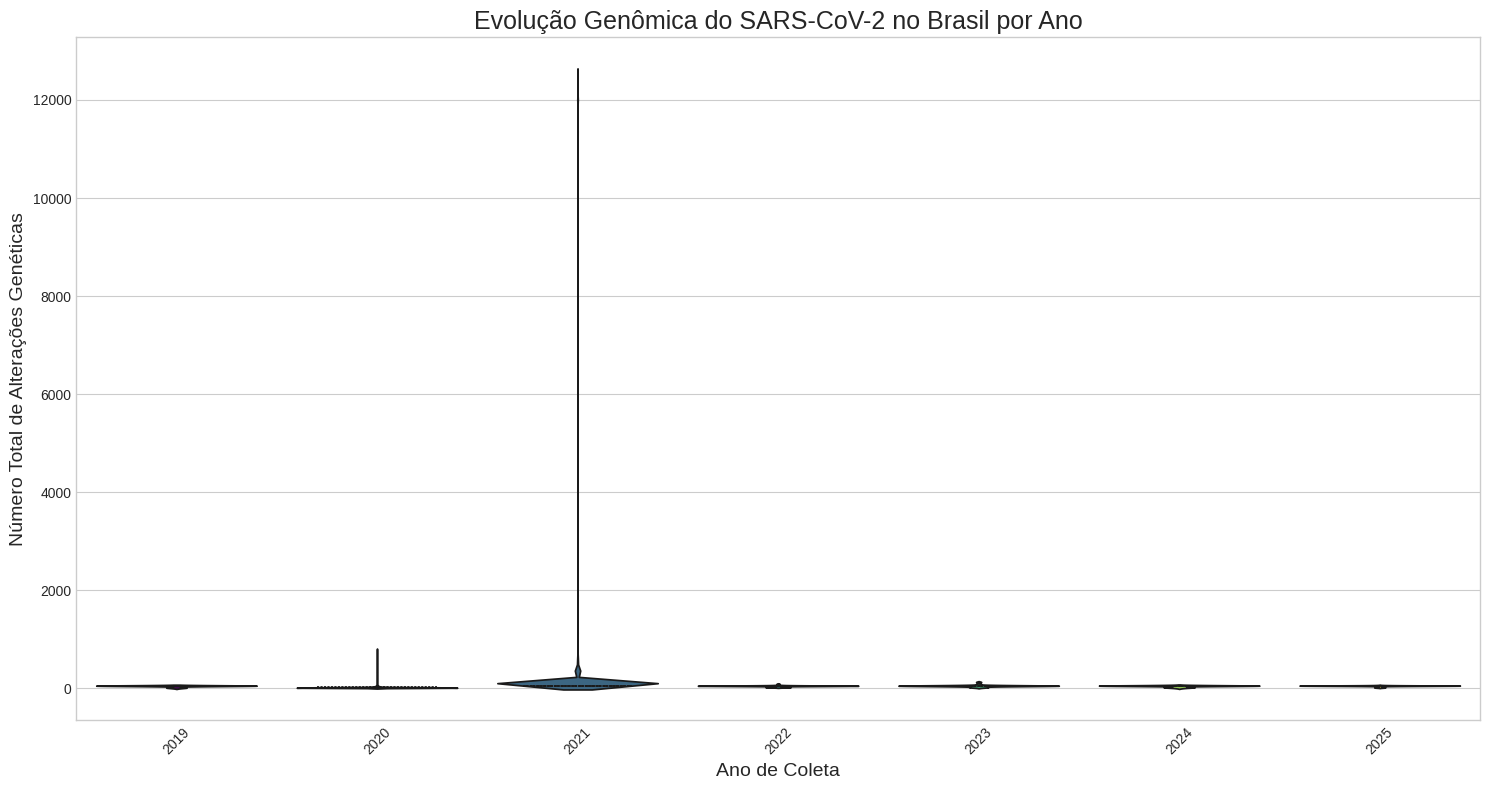

In [ ]:
# --- Geração do Gráfico A ---

print("Iniciando a geração do Gráfico A...")

# Configurações do gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# Gera o gráfico de violino com a correção para o aviso do seaborn
sns.violinplot(
    data=df_grafico_A,
    x='year',
    y='total_alteracoes',
    hue='year', # Correção para o aviso
    palette='viridis',
    inner='quartile',
    legend=False
)

# Títulos e rótulos
plt.title('Evolução Genômica do SARS-CoV-2 no Brasil por Ano', fontsize=18)
plt.xlabel('Ano de Coleta', fontsize=14)
plt.ylabel('Número Total de Alterações Genéticas', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostra o gráfico diretamente no Colab
plt.show()

--- Gerando Gráfico A Corrigido (Box Plot) ---


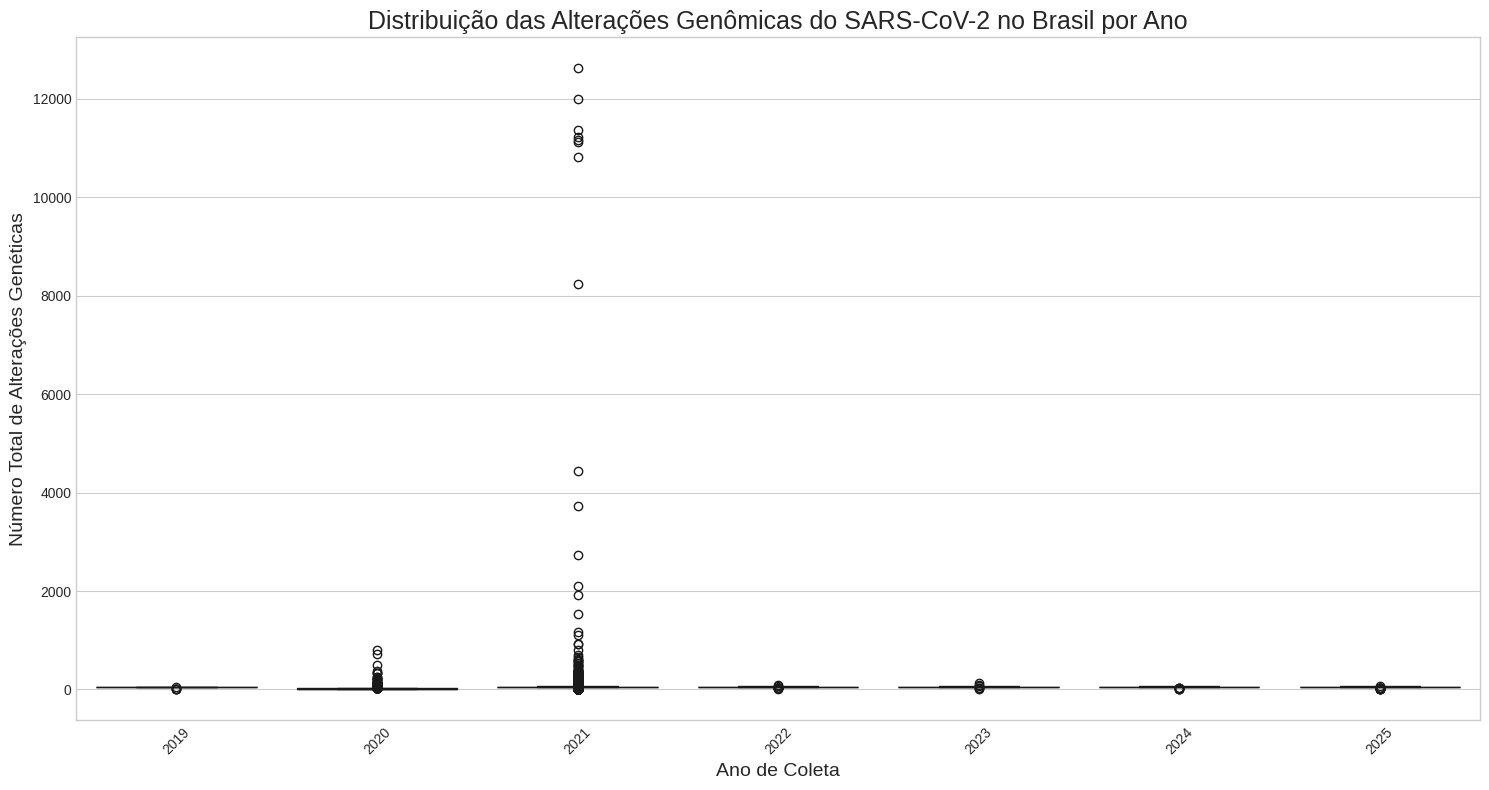

In [ ]:
print("--- Gerando Gráfico A Corrigido (Box Plot) ---")

# Configurações do gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# --- A MUDANÇA PRINCIPAL ESTÁ AQUI ---
# Trocamos o violinplot por um boxplot, que lida melhor com outliers.
sns.boxplot(
    data=df_grafico_A,
    x='year',
    y='total_alteracoes',
    hue='year', # Usando a correção para o aviso
    palette='viridis',
    legend=False
)
# --- FIM DA MUDANÇA ---

# DICA: Se o boxplot ainda estiver muito "achatado",
# você pode forçar um limite no eixo Y para dar "zoom".
# Descomente a linha abaixo para testar.
# plt.ylim(0, 200)

# Títulos e rótulos
plt.title('Distribuição das Alterações Genômicas do SARS-CoV-2 no Brasil por Ano', fontsize=18)
plt.xlabel('Ano de Coleta', fontsize=14)
plt.ylabel('Número Total de Alterações Genéticas', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostra o gráfico diretamente no Colab
plt.show()

--- Iniciando a Etapa Final: Análise por Localização (Pergunta B) ---
Coluna 'state' extraída com sucesso.
Coluna 'region' criada a partir de 'state'.
Total de amostras com localização válida: 95217
Contagem de amostras por localização realizada.

Gerando Gráfico B1 (por Região)...


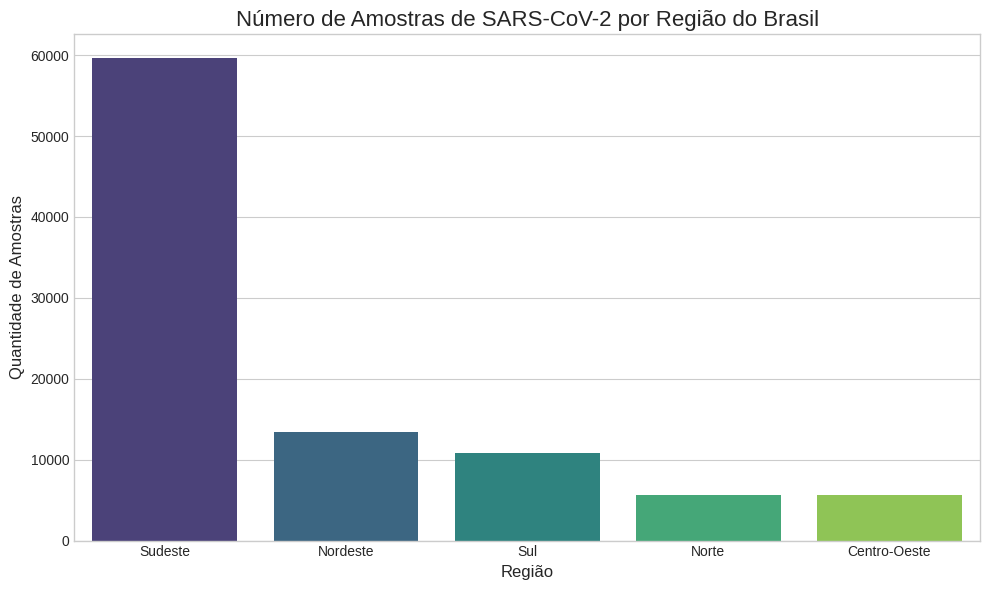


Gerando Gráfico B2 (por Estado)...


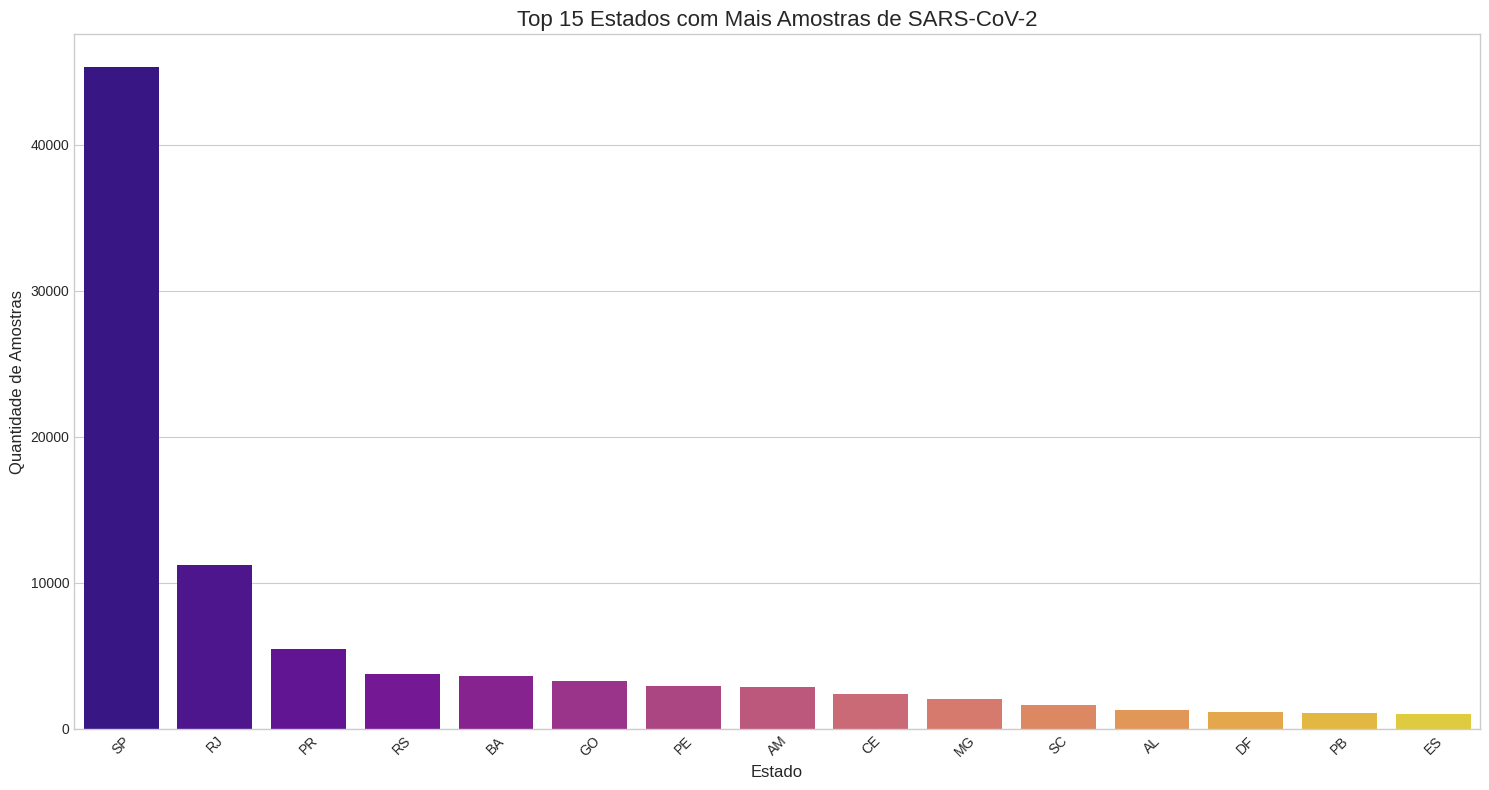

In [ ]:
print("--- Iniciando a Etapa Final: Análise por Localização (Pergunta B) ---")

# 1. ENGENHARIA DE FEATURES: Extrair a sigla do estado da coluna 'seqName'
# Quebramos o texto usando '/' e pegamos o 3º item (índice 2).
# Depois, quebramos por '-' e pegamos o 1º item para ter só a sigla limpa (ex: SP).
# O 'errors='ignore'' evita que o script quebre se alguma seqName não tiver o formato esperado.
df['state'] = df['seqName'].str.split('/', expand=True)[2].str.split('-', expand=True)[0]
print("Coluna 'state' extraída com sucesso.")

# 2. MAPEAMENTO: Criar a coluna 'region' a partir da sigla do estado
mapa_estado_regiao = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}
df['region'] = df['state'].map(mapa_estado_regiao)
print("Coluna 'region' criada a partir de 'state'.")

# 3. LIMPEZA: Remove linhas onde não foi possível identificar a região
df_grafico_B = df.dropna(subset=['region', 'state']).copy()
print(f"Total de amostras com localização válida: {len(df_grafico_B)}")

# 4. AGREGAÇÃO: Contar as amostras
contagem_regiao = df_grafico_B['region'].value_counts()
contagem_estado = df_grafico_B['state'].value_counts().nlargest(15)
print("Contagem de amostras por localização realizada.")

# --- VISUALIZAÇÃO B1: Por Região ---
print("\nGerando Gráfico B1 (por Região)...")
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_regiao.index, y=contagem_regiao.values, hue=contagem_regiao.index, palette='viridis', legend=False)
plt.title('Número de Amostras de SARS-CoV-2 por Região do Brasil', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Quantidade de Amostras', fontsize=12)
plt.tight_layout()
plt.show()

# --- VISUALIZAÇÃO B2: Por Estado (Top 15) ---
print("\nGerando Gráfico B2 (por Estado)...")
plt.figure(figsize=(15, 8))
sns.barplot(x=contagem_estado.index, y=contagem_estado.values, hue=contagem_estado.index, palette='plasma', legend=False)
plt.title('Top 15 Estados com Mais Amostras de SARS-CoV-2', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Quantidade de Amostras', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

--- Gerando Gráfico de Barras: Evolução Quantitativa da Média de Mutações ---


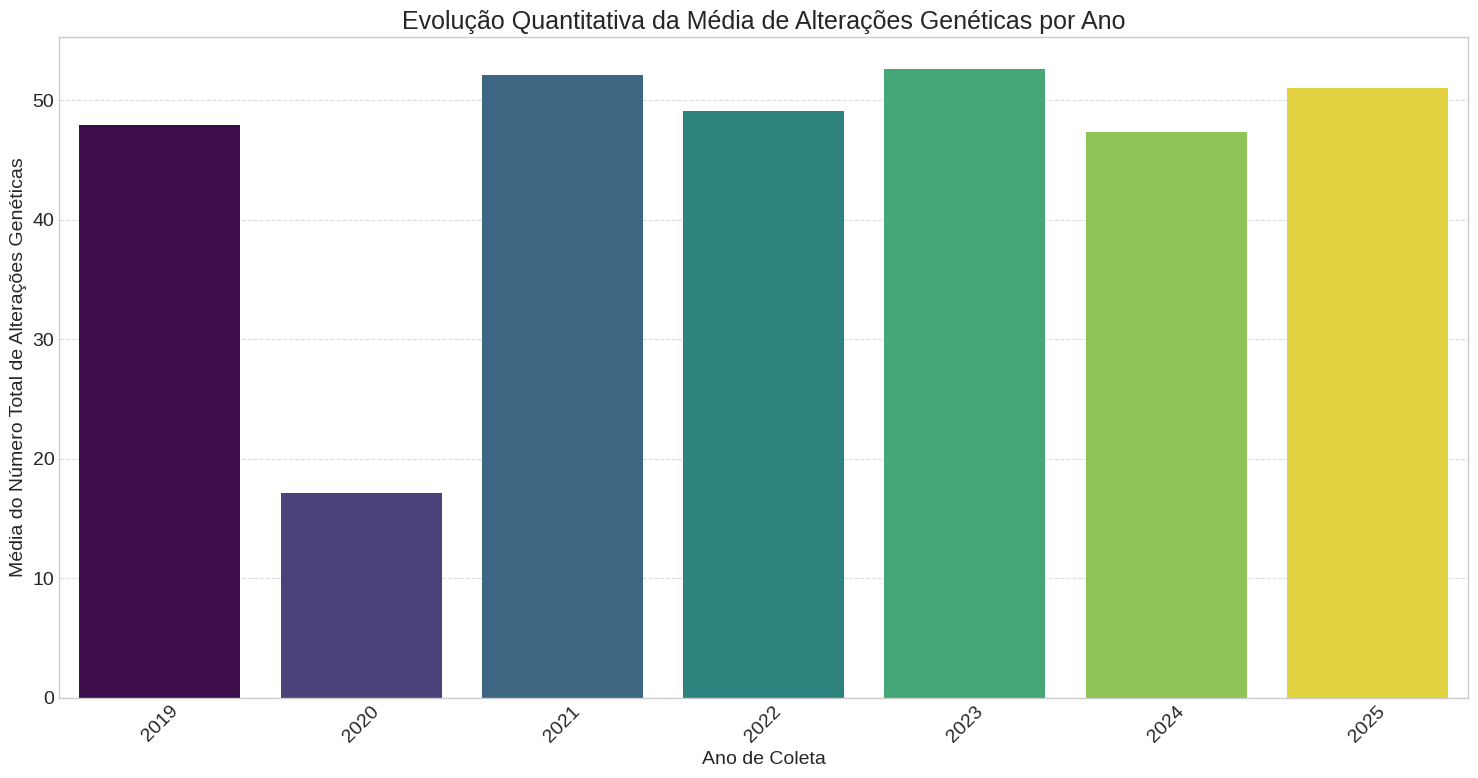


Este gráfico de barras mostra claramente a média de mutações aumentando (ou diminuindo) a cada ano, enfatizando a 'quantidade'.


In [ ]:
print("--- Gerando Gráfico de Barras: Evolução Quantitativa da Média de Mutações ---")

# Importações para garantir que a célula seja independente
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# CALCULANDO A MÉDIA DE MUTAÇÕES POR ANO
# O 'df_grafico_A' já tem os anos limpos e as alterações totais
df_media_por_ano = df_grafico_A.groupby('year')['total_alteracoes'].mean().reset_index()

# GERA O GRÁFICO DE BARRAS
sns.barplot(
    data=df_media_por_ano,
    x='year',
    y='total_alteracoes',
    hue='year', # Para colorir as barras por ano
    palette='viridis',
    legend=False
)

plt.title('Evolução Quantitativa da Média de Alterações Genéticas por Ano', fontsize=18)
plt.xlabel('Ano de Coleta', fontsize=14)
plt.ylabel('Média do Número Total de Alterações Genéticas', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Grid apenas no eixo Y para clareza
plt.tight_layout()
plt.show()

print("\nEste gráfico de barras mostra claramente a média de mutações aumentando (ou diminuindo) a cada ano, enfatizando a 'quantidade'.")

--- Gerando Gráfico: SOMA TOTAL de Alterações Genéticas por Ano ---


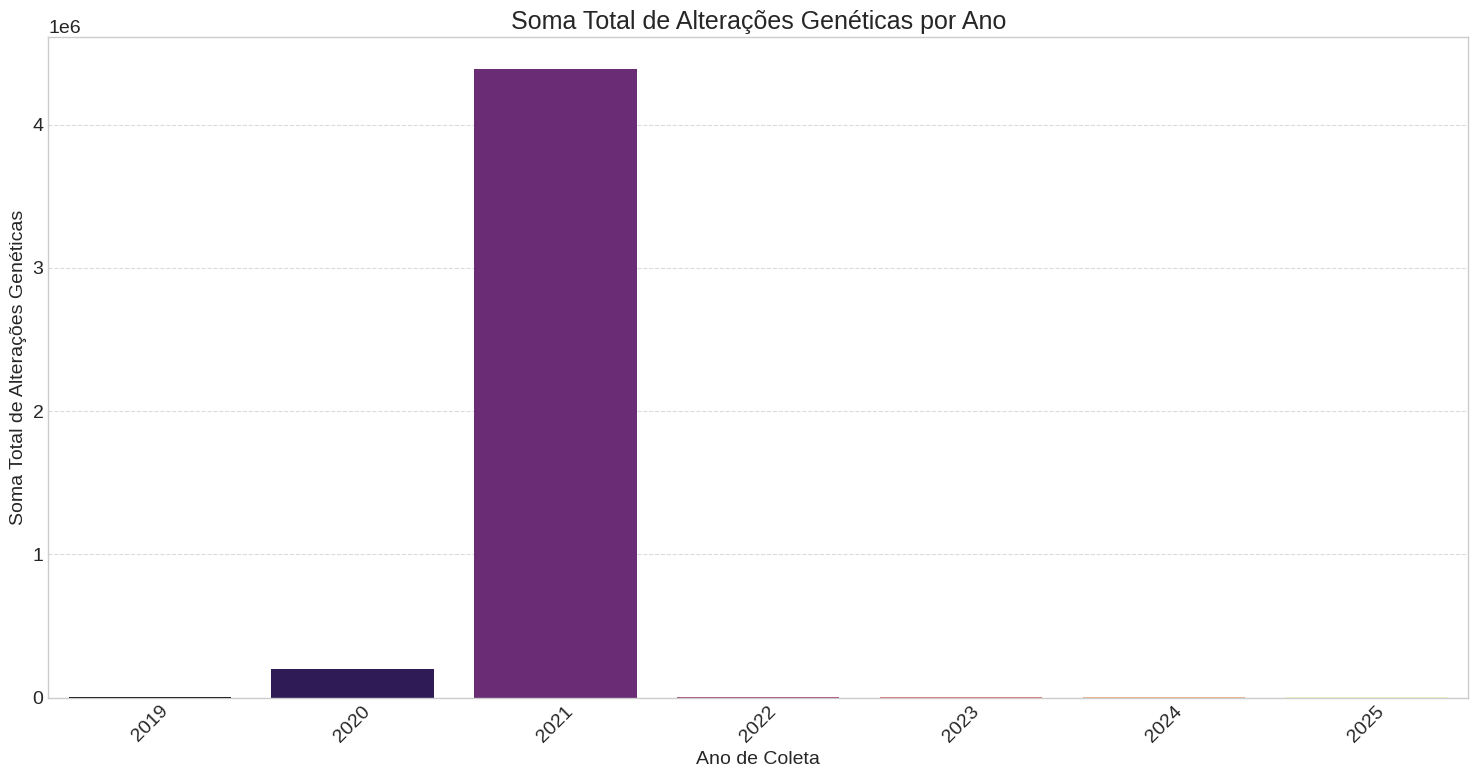


Este gráfico mostra o volume acumulado de mutações detectadas em cada ano. Se a barra de 2021 for a maior, é por ter muitas amostras com mutações.


In [ ]:
print("--- Gerando Gráfico: SOMA TOTAL de Alterações Genéticas por Ano ---")

# Importações para garantir a célula independente
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# Agrupa por ano e SOMA o 'total_alteracoes'
df_soma_por_ano = df_grafico_A.groupby('year')['total_alteracoes'].sum().reset_index()

sns.barplot(
    data=df_soma_por_ano,
    x='year',
    y='total_alteracoes',
    hue='year',
    palette='magma', # Uma nova paleta de cores
    legend=False
)

plt.title('Soma Total de Alterações Genéticas por Ano', fontsize=18)
plt.xlabel('Ano de Coleta', fontsize=14)
plt.ylabel('Soma Total de Alterações Genéticas', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nEste gráfico mostra o volume acumulado de mutações detectadas em cada ano. Se a barra de 2021 for a maior, é por ter muitas amostras com mutações.")

--- Gerando Múltiplos Histogramas de Alterações Genéticas por Ano (Dica do Professor) ---
Número de amostras após remover outliers de mutações (> 102): 95600


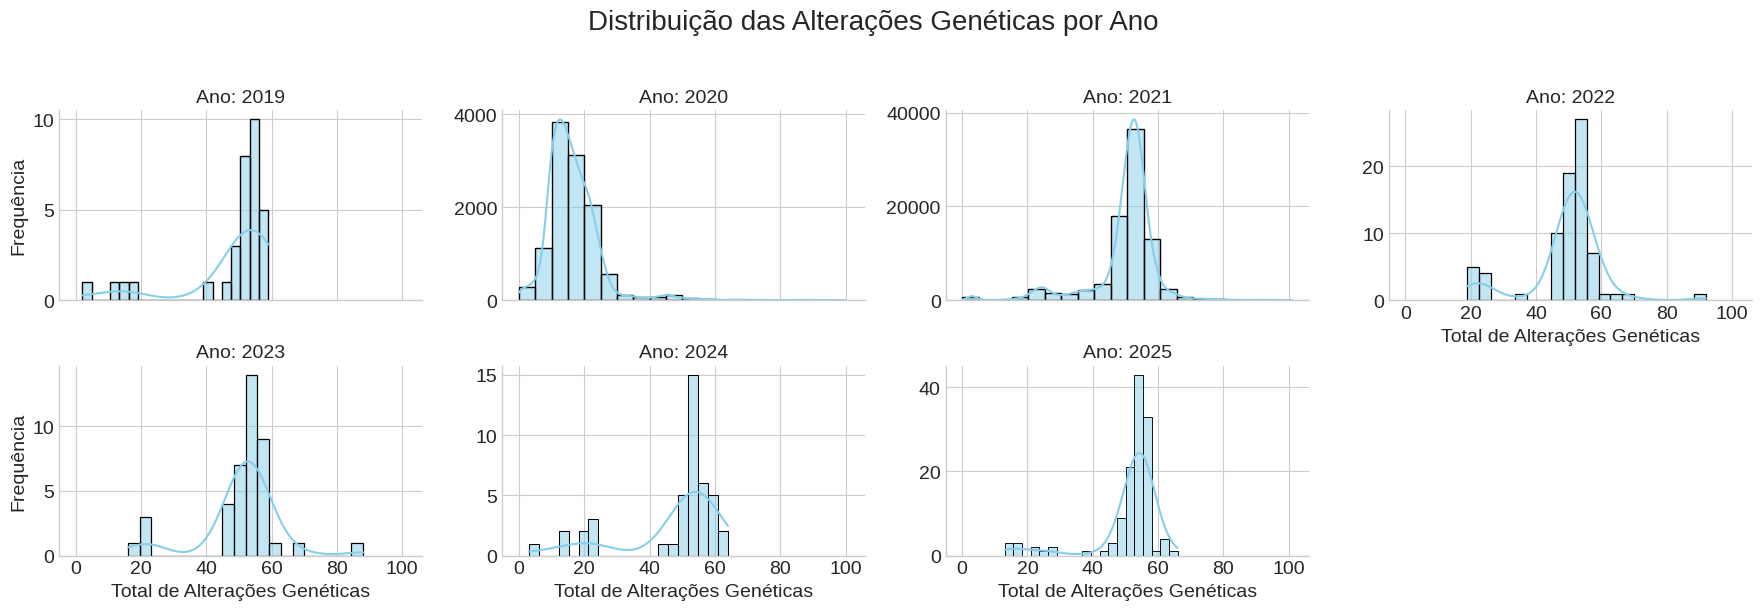


Este conjunto de gráficos individuais (Small Multiples) deve mostrar claramente a distribuição de mutações para cada ano, resolvendo o problema da escala.


In [ ]:
print("--- Gerando Múltiplos Histogramas de Alterações Genéticas por Ano (Dica do Professor) ---")

# Importações para garantir a célula independente
import matplotlib.pyplot as plt
import seaborn as sns

# 1. FILTRAR OUTLIERS EXTREMOS DA COLUNA 'total_alteracoes'
# Mantemos o filtro para que os histogramas individuais fiquem mais claros
limite_muta_max = df_grafico_A['total_alteracoes'].quantile(0.995)
df_filtrado_muta = df_grafico_A[df_grafico_A['total_alteracoes'] <= limite_muta_max].copy()
print(f"Número de amostras após remover outliers de mutações (> {limite_muta_max:.0f}): {len(df_filtrado_muta)}")


# 2. DEFINIR A ORDEM DOS ANOS PARA QUE APAREÇAM CORRETAMENTE
anos_ordenados = sorted(df_filtrado_muta['year'].unique())

# 3. CRIAR A GRADE DE GRÁFICOS (FacetGrid)
# O 'col' define a coluna que será usada para dividir os gráficos (neste caso, 'year')
# O 'col_wrap' define quantos gráficos terão por linha
g = sns.FacetGrid(
    df_filtrado_muta,
    col='year',
    col_wrap=4, # 4 gráficos por linha (para caber bem na tela)
    height=3, aspect=1.5, # Ajusta o tamanho de cada mini-gráfico
    sharey=False # MUITO IMPORTANTE: Cada gráfico terá sua própria escala Y
)

# 4. PLOTAR O HISTOGRAMA EM CADA MINI-GRÁFICO
g.map(sns.histplot, 'total_alteracoes', bins=20, kde=True, color='skyblue')

# 5. ADICIONAR TÍTULOS E AJUSTES
g.set_axis_labels("Total de Alterações Genéticas", "Frequência")
g.set_titles("Ano: {col_name:.0f}") # Formata o título de cada mini-gráfico
plt.suptitle('Distribuição das Alterações Genéticas por Ano', y=1.02, fontsize=20) # Título geral
plt.tight_layout()
plt.show()

print("\nEste conjunto de gráficos individuais (Small Multiples) deve mostrar claramente a distribuição de mutações para cada ano, resolvendo o problema da escala.")